#  Build a classifier for Fashion MNIST Dataset

Experiment with this model using these scenarios for the hidden layers and plot the history graph in each scenario and write a conclusion about the best structure to use in this problem and about why some scnearios have bad perfromance here (if any)
Scenarios:

     1. Use 2 RELU layers 

     2. Use 2 linear layers 
     
     3. Use 1 RELU layer
     
     4. use 2 RELU layers with # nodes = 150,50 respectively

TensorFlow 2.x selected.


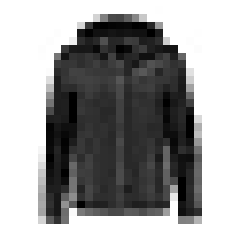

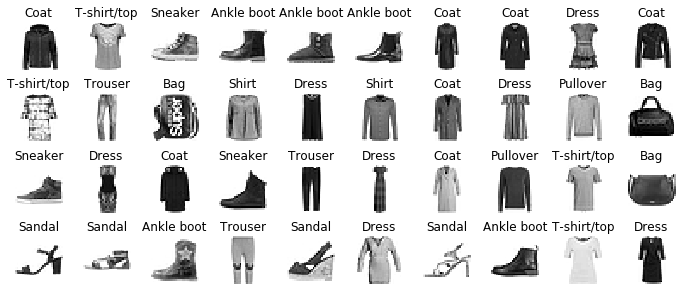

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 111us/sample - loss: 0.7125 - accuracy: 0.7648 - val_loss: 0.5105 - val_accuracy: 0.8274
Epoch 2/30
55000/55000 [=========================

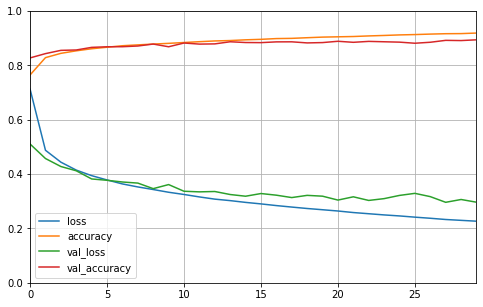

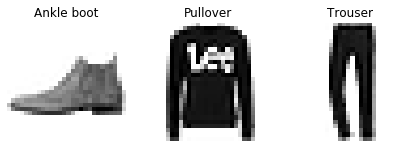

In [1]:
# scenario - 1 .. Code
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np



fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
X_valid.shape
X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.layers
model.summary()
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params
print(history.epoch)
history.history.keys()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

# scenario - 1 .. Graph
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

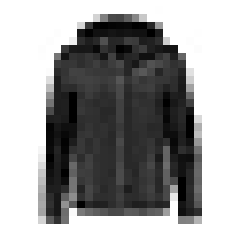

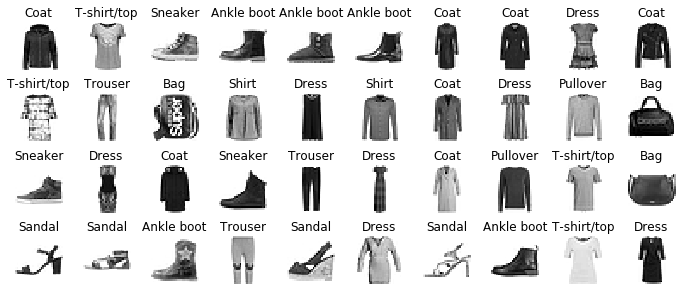

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 101us/sample - loss: 0.6311 - accuracy: 0.7855 - val_loss: 0.4992 - val_accuracy: 0.8342
Epoch 2/30
55000/55000 [=========================

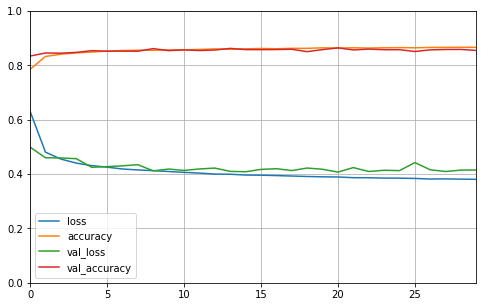

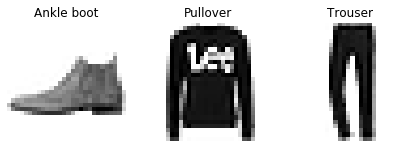

In [2]:
# scenario - 2 .. Code

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
X_valid.shape
X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="linear"))
model.add(keras.layers.Dense(100, activation="linear"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.layers
model.summary()
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params
print(history.epoch)
history.history.keys()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

# scenario - 2 .. Graph

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

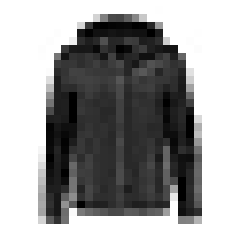

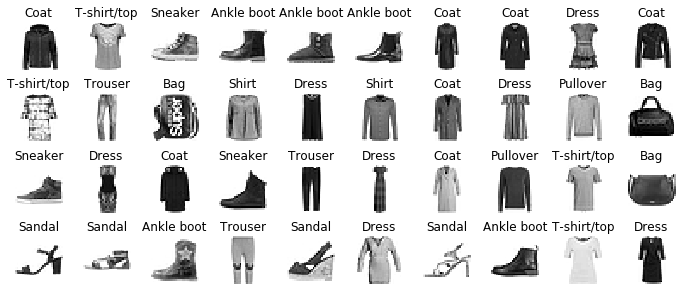

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.7431 - accuracy: 0.7600 - val_loss: 0.5404 - val_accuracy: 0.8232
Epoch 2/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.5159 - accuracy: 0.8250 - val_loss: 0.4827 - val_accuracy: 0.8410
Epoch 3/30
55000/55000 [=========

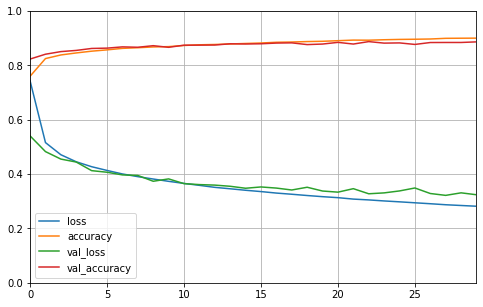

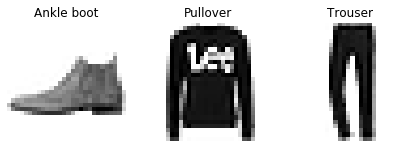

In [3]:
# scenario - 3 .. Code

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
X_valid.shape
X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.layers
model.summary()
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params
print(history.epoch)
history.history.keys()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

# scenario - 3 .. Graph

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

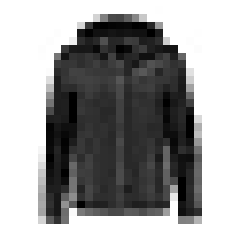

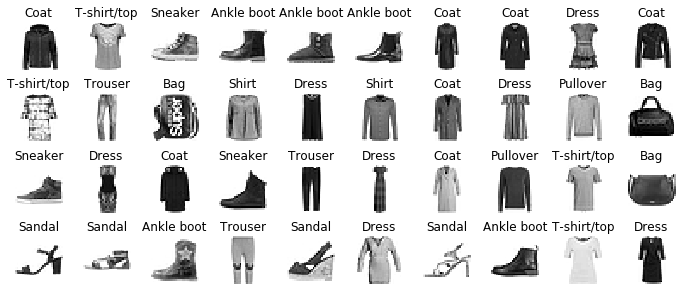

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                7550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 125,810
Trainable params: 125,810
Non-trainable params: 0
_________________________________________________________________
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.7396 - accuracy: 0.7602 - val_loss: 0.5164 - val_accuracy: 0.8280
Epoch 2/30
55000/55000 [==========================

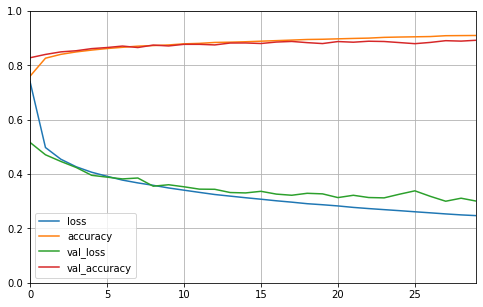

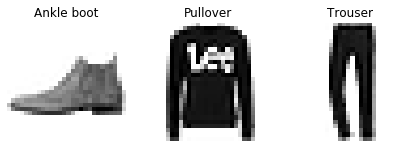

In [5]:
# scenario - 4 .. Code

import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

y_train

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]
X_valid.shape
X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.layers
model.summary()
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params
print(history.epoch)
history.history.keys()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

# scenario - 4 .. Graph

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Conclusion:

#1- Use 2 ReLU layers
training loss: 0.2253 - accuracy: 0.9184 - val_loss: 0.3265 - val_accuracy: 0.8840

test     loss: 0.3313 - accuracy: 0.8811
        
#2- Use 2 linear layers 
training loss: loss: 0.3808 - accuracy: 0.8663 - val_loss: 0.4148 - val_accuracy: 0.8548

test     loss: 0.4479 - accuracy: 0.8427

        
#3-  Use 1 RELU layer
training loss: 0.2817 - accuracy: 0.9001 - val_loss: 0.3239 - val_accuracy: 0.8864

test     loss: 0.3560 - accuracy: 0.8739
        
#4-  use 2 RELU layers with # nodes = 150,50 respectively
trainig  loss: 0.2471 - accuracy: 0.9099 - val_loss: 0.3004 - val_accuracy: 0.8924

test     loss: 0.3334 - accuracy: 0.8805
        
from Accuracy perspective:

best training accuracy is 2 ReLU layers

best validation accuracy is 2 RELU layers with # nodes = 150,50 respectively

best test accuracy is 2 ReLU layers with # nodes = 150,50 respectively

from loss perspective:

min training loss is  2 ReLU layers

min validation loss is  2 RELU layers with # nodes = 150,50 respectively

min test loss is  2 ReLU layers with # nodes = 150,50 respectively & 2 ReLU


so as final colclusion 2 tanh layers & 2 RELu layers with ( # nodes = 150,50 respectively) are the best deep neural network architecure fit for our case.